In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)


In [5]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [7]:
file_name = "housing.csv"

# Call the download function
download(filepath, file_name)

In [8]:
df = pd.read_csv(file_name)

In [9]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
##Q1
##Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [12]:
# Question 2
# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [13]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)


In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [15]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [16]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [18]:
# Question 3
# Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [20]:
floor_counts = df["floors"].value_counts()

floor_counts_df = floor_counts.to_frame()

floor_counts_df.columns = ["house_count"]

print(floor_counts_df)

     house_count
1.0        10680
2.0         8241
1.5         1910
3.0          613
2.5          161
3.5            8


In [ ]:
# Question 4
# Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

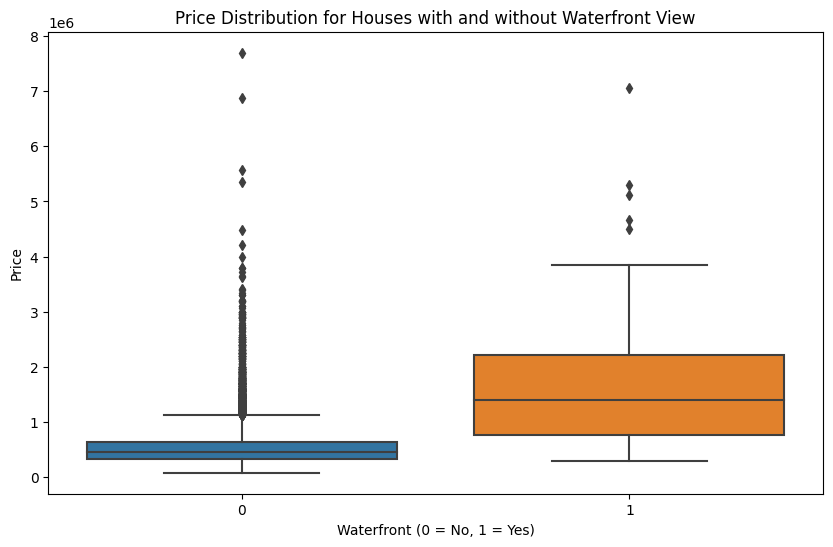

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="waterfront", y="price", data=df)

# Add title for clarity
plt.title("Price Distribution for Houses with and without Waterfront View")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")

# Display the plot
plt.show()

In [22]:
#Question 5
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

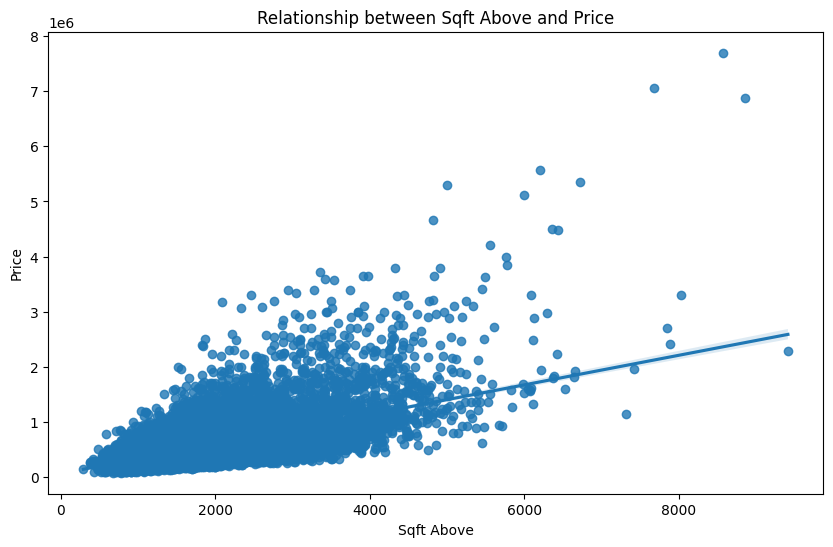

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x="sqft_above", y="price", data=df)

# Add title and labels for clarity
plt.title("Relationship between Sqft Above and Price")
plt.xlabel("Sqft Above")
plt.ylabel("Price")

# Display the plot
plt.show()

In [24]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
# Question 6
# Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [25]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [26]:
X = df[['sqft_living']]
Y = df['price']

# Create and fit the Linear Regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate the R^2 score
r2_score = lm.score(X, Y)

# Print the R^2 score
print("R^2 Score:", r2_score)

R^2 Score: 0.4928532179037931


In [27]:
# #Question 7
# Fit a linear regression model to predict the 'price' using the list of features:



In [28]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define the feature set (X) and target variable (Y)
X = df[features]
Y = df['price']

# Create and fit the Linear Regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate the R^2 score
r2_score = lm.score(X, Y)

# Print the R^2 score
print("R^2 Score:", r2_score)

R^2 Score: 0.6576788525261241


In [29]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [30]:
# Question 8
# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [33]:
X = df[features]
Y = df['price']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a pipeline with a StandardScaler and LinearRegression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Calculate the R^2 score on the test set
r2_score = pipeline.score(X_test, Y_test)

# Print the R^2 score
print("R^2 Score:", r2_score)

R^2 Score: 0.6614029431732535


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")


done


In [35]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [36]:
# Question 9
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.



In [37]:
from sklearn.linear_model import Ridge

In [38]:
X = df[features]
Y = df['price']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit a Ridge regression model with alpha (regularization parameter) set to 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, Y_train)

# Calculate the R^2 score on the test data
r2_score = ridge.score(X_test_scaled, Y_test)

# Print the R^2 score
print("R^2 Score with Ridge Regression:", r2_score)


R^2 Score with Ridge Regression: 0.6614027981833235


In [ ]:
# Question 10
# Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [39]:
X = df[features]
Y = df['price']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform second order polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and fit a Ridge regression model with alpha (regularization parameter) set to 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, Y_train)

# Calculate the R^2 score on the test data
r2_score = ridge.score(X_test_poly, Y_test)

# Print the R^2 score
print("R^2 Score with Polynomial Transformation and Ridge Regression:", r2_score)


R^2 Score with Polynomial Transformation and Ridge Regression: 0.7111636479597743
